In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('D:/Users/ehern/Desktop/CS 4661 Data Science/Project/healthcare/train_data.csv')
df_test = pd.read_csv('D:/Users/ehern/Desktop/CS 4661 Data Science/Project/healthcare/test_data.csv')

In [3]:
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
df_test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [5]:
df_train = pd.get_dummies(df_train,prefix=['Department'], columns = ['Department'], drop_first=True)

In [6]:
df_train = pd.get_dummies(df_train,prefix=['Type of Admission'], columns = ['Type of Admission'], drop_first=True)


In [7]:
df_test = pd.get_dummies(df_test,prefix=['Department'], columns = ['Department'], drop_first=True)

In [8]:
df_test = pd.get_dummies(df_test,prefix=['Type of Admission'], columns = ['Type of Admission'], drop_first=True)

In [9]:
def normalize(df):

  hrc = df['Hospital_region_code'].unique()
  new_hrc = dict(zip(hrc, range(len(hrc))))
  df['Hospital_region_code'].replace(new_hrc, inplace=True)

  ward = df['Ward_Type'].unique()
  new_ward = dict(zip(ward, range(len(ward))))
  df['Ward_Type'].replace(new_ward, inplace=True)

  wfc = df['Ward_Facility_Code'].unique()
  new_wfc = dict(zip(wfc, range(len(wfc))))
  df['Ward_Facility_Code'].replace(new_wfc, inplace=True)

  soi = df['Severity of Illness'].unique()
  new_soi = dict(zip(soi, range(len(soi))))
  df['Severity of Illness'].replace(new_soi, inplace=True)

  age = df['Age'].unique()
  new_age = dict(zip(age, range(len(age))))
  df['Age'].replace(new_age, inplace=True)

  htc = df['Hospital_type_code'].unique()
  new_htc = dict(zip(htc, range(len(htc))))
  df['Hospital_type_code'].replace(new_htc, inplace=True)

In [10]:
normalize(df_train)
normalize(df_test)

In [11]:
stay_list = df_train['Stay'].unique()
stay_dict = dict(zip(stay_list, range(len(stay_list))))
df_train['Stay'].replace(stay_dict, inplace=True)

In [12]:
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,...,Visitors with Patient,Age,Admission_Deposit,Stay,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Type of Admission_Trauma,Type of Admission_Urgent
0,1,8,0,3,0,3,0,0,2.0,31397,...,2,0,4911.0,0,0,0,1,0,0,0
1,2,2,0,5,0,2,1,0,2.0,31397,...,2,0,5954.0,1,0,0,1,0,1,0
2,3,10,1,1,1,2,1,1,2.0,31397,...,2,0,4745.0,2,1,0,0,0,1,0
3,4,26,2,2,2,2,0,2,2.0,31397,...,2,0,7272.0,1,0,0,1,0,1,0
4,5,26,2,2,2,2,1,2,2.0,31397,...,2,0,5558.0,1,0,0,1,0,1,0


In [13]:
df_test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,...,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Type of Admission_Trauma,Type of Admission_Urgent
0,318439,21,0,3,0,3,0,0,2.0,17006,...,0,2,0,3095.0,0,1,0,0,0,0
1,318440,29,1,4,1,2,0,1,2.0,17006,...,0,4,0,4018.0,0,1,0,0,1,0
2,318441,26,2,2,2,3,1,2,4.0,17006,...,0,3,0,4492.0,0,1,0,0,0,0
3,318442,6,1,6,1,3,1,1,2.0,17006,...,0,3,0,4173.0,0,1,0,0,1,0
4,318443,28,2,11,1,2,2,1,2.0,17006,...,0,4,0,4161.0,0,1,0,0,1,0


In [14]:
df_train.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                     int64
City_Code_Hospital                     int64
Hospital_region_code                   int64
Available Extra Rooms in Hospital      int64
Ward_Type                              int64
Ward_Facility_Code                     int64
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Severity of Illness                    int64
Visitors with Patient                  int64
Age                                    int64
Admission_Deposit                    float64
Stay                                   int64
Department_anesthesia                  uint8
Department_gynecology                  uint8
Department_radiotherapy                uint8
Department_surgery                     uint8
Type of Admission_Trauma               uint8
Type of Admission_Urgent               uint8
dtype: obj

In [15]:
df_train['Stay'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [16]:
features = ["case_id", "Hospital_code", "Hospital_type_code", "City_Code_Hospital", "Hospital_region_code", "Available Extra Rooms in Hospital", "Ward_Type", "Ward_Facility_Code", "patientid", "Severity of Illness", "Visitors with Patient", "Age", "Admission_Deposit", "Stay", "Department_anesthesia", "Department_gynecology", "Department_radiotherapy", "Department_surgery", "Type of Admission_Trauma", "Type of Admission_Urgent"]

In [17]:
X = df_train[features]
y = df_train['Stay']
X

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,patientid,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Type of Admission_Trauma,Type of Admission_Urgent
0,1,8,0,3,0,3,0,0,31397,0,2,0,4911.0,0,0,0,1,0,0,0
1,2,2,0,5,0,2,1,0,31397,0,2,0,5954.0,1,0,0,1,0,1,0
2,3,10,1,1,1,2,1,1,31397,0,2,0,4745.0,2,1,0,0,0,1,0
3,4,26,2,2,2,2,0,2,31397,0,2,0,7272.0,1,0,0,1,0,1,0
4,5,26,2,2,2,2,1,2,31397,0,2,0,5558.0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,3,6,1,3,2,0,86499,1,3,3,4144.0,3,0,0,1,0,0,0
318434,318435,24,3,1,1,2,2,1,325,1,4,4,6699.0,2,1,0,0,0,0,1
318435,318436,7,3,4,1,3,0,0,125235,2,3,1,4235.0,3,0,1,0,0,0,0
318436,318437,11,2,2,2,3,2,2,91081,2,5,7,3761.0,3,1,0,0,0,1,0


#### KNN by splitting the data:

In [18]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=8)
# newK = [21]
# for k in newK:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_predict = knn.predict(X_test)
#     accuracy = accuracy_score(y_test, y_predict)
#     print(accuracy)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

newK = [21]
for k in newK:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print(accuracy)

0.26263032282376586


#### KNN using cross-validation:

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=6)


# k = 3
# my_knn = KNeighborsClassifier(n_neighbors=k)
# # function cross_val_score performs Cross Validation:
# accuracy_list = cross_val_score(my_knn, X, y, cv=10, scoring='accuracy')

# accuracy_cv = accuracy_list.mean()

# print(accuracy_cv)

#### Logistic Regression with AUC and ROC Curve

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

my_logreg = LogisticRegression()
my_logreg.fit(X_train, y_train)
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)
score_lr = accuracy_score(y_test, y_predict_lr)

print(score_lr)

[5 5 5 ... 5 3 5]
0.27929908302977013


C:\Users\ehern\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
y_predict_prob_lr = my_logreg.predict_proba(X_test)

print(y_predict_prob_lr)

[[0.07657757 0.02940545 0.17760618 ... 0.01006172 0.00470216 0.00480196]
 [0.08713711 0.05096874 0.1646709  ... 0.01991139 0.01603705 0.01441523]
 [0.06176966 0.02304955 0.17624515 ... 0.00580827 0.00297787 0.00282095]
 ...
 [0.06201624 0.04283126 0.17495379 ... 0.01620526 0.01045505 0.01038248]
 [0.09389316 0.04398438 0.16677707 ... 0.01563116 0.01174038 0.01039095]
 [0.06131669 0.04852929 0.17231213 ... 0.02078505 0.01358458 0.01388047]]


In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.00000000e+00 1.30379796e-05 2.60759593e-05 ... 9.99804430e-01
 9.99804430e-01 1.00000000e+00]
[0.         0.         0.         ... 0.99965648 1.         1.        ]


In [24]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.5005916470335938


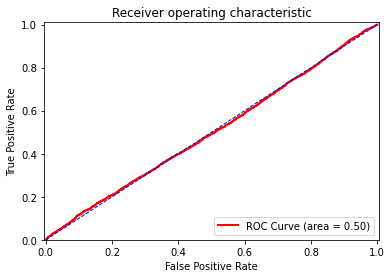

In [25]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()